<a href="https://colab.research.google.com/github/Ashkabsha/TimeSeries/blob/main/bi_lstm_PRO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Packages

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
import yfinance as yf
from keras.initializers import RandomNormal
from keras.layers import Bidirectional

In [2]:


stock_symbol = 'AAPL'
df = yf.download(stock_symbol,period="60mo",interval="1d")
print(df.head())

[*********************100%%**********************]  1 of 1 completed
                 Open       High        Low      Close  Adj Close     Volume
Date                                                                        
2018-11-26  43.560001  43.737499  42.564999  43.654999  41.900532  179994000
2018-11-27  42.877499  43.692501  42.720001  43.560001  41.809361  165549600
2018-11-28  44.182499  45.322498  43.732498  45.235001  43.417042  184250000
2018-11-29  45.665001  45.700001  44.424999  44.887501  43.083511  167080000
2018-11-30  45.072498  45.082500  44.257500  44.645000  42.850761  158126000


Importing Data

In [3]:
df.index = df.index.strftime('%Y-%m-%d')

In [4]:
df


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-11-26,43.560001,43.737499,42.564999,43.654999,41.900532,179994000
2018-11-27,42.877499,43.692501,42.720001,43.560001,41.809361,165549600
2018-11-28,44.182499,45.322498,43.732498,45.235001,43.417042,184250000
2018-11-29,45.665001,45.700001,44.424999,44.887501,43.083511,167080000
2018-11-30,45.072498,45.082500,44.257500,44.645000,42.850761,158126000
...,...,...,...,...,...,...
2023-11-17,190.250000,190.380005,188.570007,189.690002,189.690002,50922700
2023-11-20,189.889999,191.910004,189.880005,191.449997,191.449997,46505100
2023-11-21,191.410004,191.520004,189.740005,190.639999,190.639999,38134500


In [5]:
len(df)

1258

<Axes: xlabel='Date'>

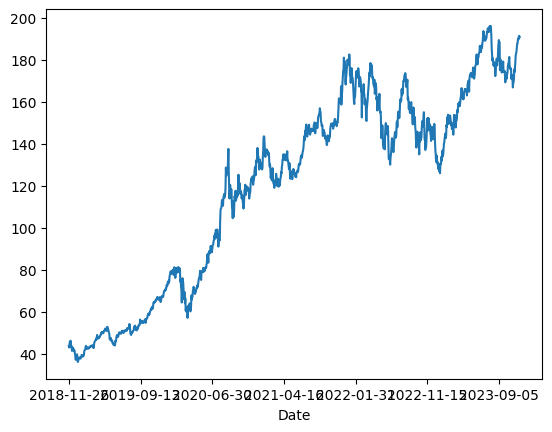

In [6]:
df['Open'].plot()

In [7]:
b_size=32
epoch=200
train_per=0.8
w_size=30
f_size=10

In [8]:
t_size=int(len(df)*train_per)

Train-Test Split

In [9]:
training = df.iloc[:t_size, 1:2].values
testing = df.iloc[t_size:, 1:2].values

Normalization

In [10]:
sc = MinMaxScaler(feature_range = (0, 1))
training_scaled = sc.fit_transform(training)

Create target values

In [11]:
x_train = []
y_train = []
for iter in range(w_size, t_size):
    x_train.append(training_scaled[iter-w_size:iter, 0])
    y_train.append(training_scaled[iter, 0])
x_train, y_train=np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))

Defining Model

In [17]:
initializer = RandomNormal(mean=0.0, stddev=0.05)
algo = Sequential()
algo.add(Bidirectional(LSTM(30,return_sequences=True,activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo.add(Dropout(0.1))
algo.add(Bidirectional(LSTM(120)))
algo.add(Dropout(0.2))
algo.add(Dense(1))
algo.compile(optimizer = 'adam', loss = 'mean_squared_error')
#print(algo.summary())


Training Model

In [18]:
algo.fit(x_train, y_train, epochs = epoch, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/200
26/26 - 18s - loss: 0.0617 - val_loss: 0.0051 - 18s/epoch - 708ms/step
Epoch 2/200
26/26 - 3s - loss: 0.0038 - val_loss: 0.0063 - 3s/epoch - 109ms/step
Epoch 3/200
26/26 - 4s - loss: 0.0025 - val_loss: 0.0045 - 4s/epoch - 155ms/step
Epoch 4/200
26/26 - 2s - loss: 0.0024 - val_loss: 0.0050 - 2s/epoch - 87ms/step
Epoch 5/200
26/26 - 2s - loss: 0.0022 - val_loss: 0.0047 - 2s/epoch - 86ms/step
Epoch 6/200
26/26 - 2s - loss: 0.0021 - val_loss: 0.0060 - 2s/epoch - 86ms/step
Epoch 7/200
26/26 - 2s - loss: 0.0021 - val_loss: 0.0036 - 2s/epoch - 86ms/step
Epoch 8/200
26/26 - 4s - loss: 0.0019 - val_loss: 0.0033 - 4s/epoch - 153ms/step
Epoch 9/200
26/26 - 3s - loss: 0.0019 - val_loss: 0.0033 - 3s/epoch - 113ms/step
Epoch 10/200
26/26 - 2s - loss: 0.0017 - val_loss: 0.0038 - 2s/epoch - 87ms/step
Epoch 11/200
26/26 - 2s - loss: 0.0022 - val_loss: 0.0030 - 2s/epoch - 88ms/step
Epoch 12/200
26/26 - 2s - loss: 0.0018 - val_loss: 0.0027 - 2s/epoch - 88ms/step
Epoch 13/200
26/26 - 3s - loss

Dividing Test values into groups

In [19]:
data_train = df.iloc[:t_size, 1:2]
data_test = df.iloc[t_size:, 1:2]
data_total = df.iloc[:,1:2]
total_input = data_total[len(data_total) - len(data_test) - w_size:].values
total_input = total_input.reshape(-1, 1)
total_input = sc.transform(total_input)
x_test = []
y_test=[]

# Calculate the maximum number of sequences of length w_size that can be created
max_sequences = len(total_input) - w_size

# loop to create a 2D array of x_test
for iter in range(max_sequences):
    x_test.append(total_input[iter:iter+w_size, 0])
    y_test.append(total_input[iter+w_size, 0])     #new addition

x_test = np.array(x_test)

print(x_test.shape)  #  (max_sequences, w_size)


(252, 30)


Prediction

In [20]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

predicted_price = algo.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)


8/8 [==============================] - 1s 26ms/step


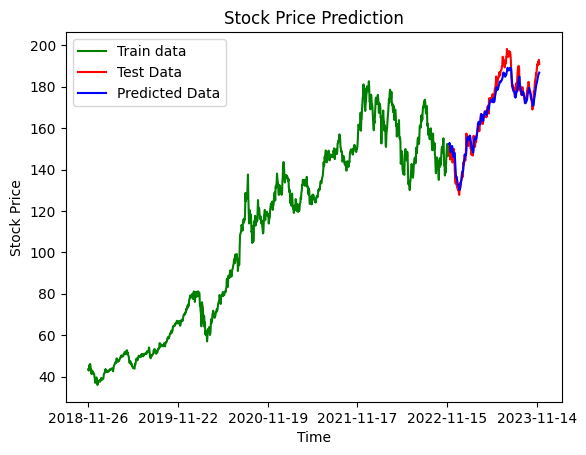

In [21]:
df.reset_index(inplace=True)
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


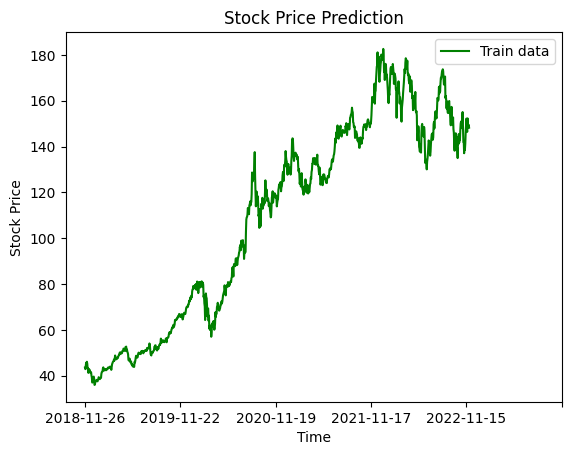

In [22]:
plt.plot(df.loc[:t_size+1,'Date'],df.loc[:t_size+1,'Open'], color='green',label="Train data")

plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

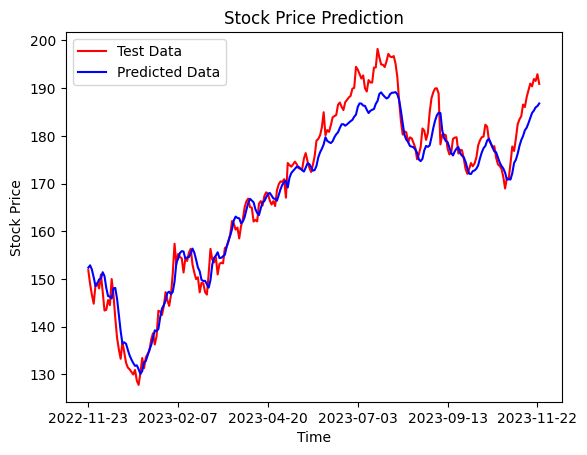

In [23]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

mae = mean_absolute_error(data_test.values,predicted_price)

mse = mean_squared_error(data_test.values, predicted_price)

rmse = np.sqrt(mse)

print(f'Mean Absolute Error (MAE): {mae:.2f}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')


Mean Absolute Error (MAE): 3.01
Mean Squared Error (MSE): 14.87
Root Mean Squared Error (RMSE): 3.86


Predict Future

In [25]:
test2=testing.copy()
for i in range(f_size):
  X=test2[-w_size:]
  X=X.reshape(w_size,1)
  X=sc.fit_transform(X)

  X=np.reshape(X,(1,w_size,1))

  close=algo.predict(X)
  y=sc.inverse_transform(close)

  test2=np.append(test2, y)


1/1 [==============================] - 0s 34ms/step


In [26]:
from datetime import datetime, timedelta
x=df.loc[-1:, 'Date']
day=x[len(x)-1]
date_obj = datetime.strptime(day, '%Y-%m-%d')
start_date = date_obj
date_list = [(start_date + timedelta(days=i)).strftime('%Y-%m-%d') for i in range(f_size)]

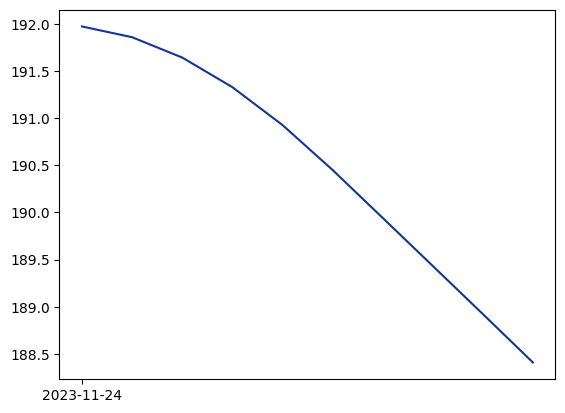

In [27]:
forcasted_data=test2[-f_size:]
plt.plot(date_list,forcasted_data,color="#123692", label="Future data")
plt.xticks(np.arange(0,len(forcasted_data),f_size))
plt.show()

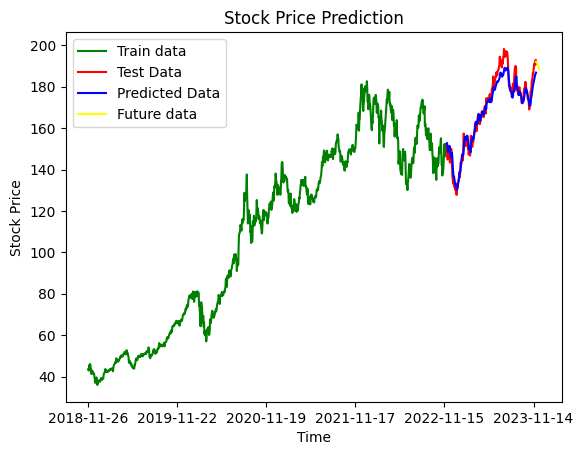

In [28]:

plt.plot(df.loc[:t_size,'Date'],df.loc[:t_size,'Open'], color='green',label="Train data")
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,df.shape[0],250))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

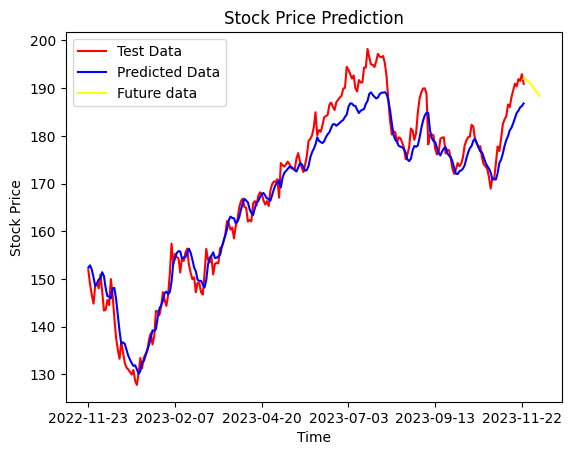

In [29]:
plt.plot(df.loc[t_size:, 'Date'],data_test.values, color = 'red', label = 'Test Data')
plt.plot(df.loc[t_size:, 'Date'],predicted_price, color = 'blue', label = 'Predicted Data')
plt.plot(date_list,forcasted_data,color='yellow', label="Future data")
plt.xticks(np.arange(0,x_test.shape[0],50))
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [31]:
algo2 = Sequential()
algo2.add(Bidirectional(LSTM(30,return_sequences=True,activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo2.add(Dropout(0.1))
algo2.add(Bidirectional(LSTM(120)))
algo2.add(Dropout(0.2))
algo2.add(Dense(1))
algo2.compile(optimizer = 'adam', loss = 'mean_squared_error')

In [34]:
algo2.fit(x_train, y_train, epochs = 50, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/50
26/26 - 4s - loss: 9.5333e-04 - val_loss: 0.0012 - 4s/epoch - 147ms/step
Epoch 2/50
26/26 - 3s - loss: 9.3808e-04 - val_loss: 0.0011 - 3s/epoch - 121ms/step
Epoch 3/50
26/26 - 2s - loss: 9.5890e-04 - val_loss: 0.0021 - 2s/epoch - 90ms/step
Epoch 4/50
26/26 - 2s - loss: 0.0012 - val_loss: 0.0011 - 2s/epoch - 88ms/step
Epoch 5/50
26/26 - 2s - loss: 0.0010 - val_loss: 0.0015 - 2s/epoch - 87ms/step
Epoch 6/50
26/26 - 3s - loss: 8.6573e-04 - val_loss: 0.0016 - 3s/epoch - 107ms/step
Epoch 7/50
26/26 - 4s - loss: 9.6793e-04 - val_loss: 0.0012 - 4s/epoch - 158ms/step
Epoch 8/50
26/26 - 2s - loss: 9.1569e-04 - val_loss: 0.0016 - 2s/epoch - 85ms/step
Epoch 9/50
26/26 - 2s - loss: 8.6759e-04 - val_loss: 0.0011 - 2s/epoch - 86ms/step
Epoch 10/50
26/26 - 2s - loss: 8.6412e-04 - val_loss: 0.0013 - 2s/epoch - 87ms/step
Epoch 11/50
26/26 - 2s - loss: 0.0010 - val_loss: 0.0010 - 2s/epoch - 86ms/step
Epoch 12/50
26/26 - 4s - loss: 8.8393e-04 - val_loss: 0.0011 - 4s/epoch - 153ms/step
Epoch 13

In [35]:
predicted_price = algo2.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

8/8 [==============================] - 1s 24ms/step


In [37]:
mae_2 = mean_absolute_error(data_test.values,predicted_price)

mse_2 = mean_squared_error(data_test.values, predicted_price)

rmse_2 = np.sqrt(mse_2)

print(f'Mean Absolute Error (MAE): {mae_2:.2f}')
print(f'Mean Squared Error (MSE): {mse_2:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_2:.2f}')

Mean Absolute Error (MAE): 21.92
Mean Squared Error (MSE): 715.28
Root Mean Squared Error (RMSE): 26.74


In [38]:
algo3 = Sequential()
algo3.add(Bidirectional(LSTM(30,return_sequences=True,activation='relu',input_shape = (x_train.shape[1], 1),kernel_initializer=initializer)))
algo3.add(Dropout(0.1))
algo3.add(Bidirectional(LSTM(120)))
algo3.add(Dropout(0.2))
algo3.add(Dense(1))
algo3.compile(optimizer = 'adam', loss = 'mean_squared_error')
algo2.fit(x_train, y_train, epochs = 75, batch_size = b_size, validation_split=0.15,verbose=2)

Epoch 1/75
26/26 - 2s - loss: 7.5149e-04 - val_loss: 0.0011 - 2s/epoch - 87ms/step
Epoch 2/75
26/26 - 2s - loss: 7.5785e-04 - val_loss: 9.4104e-04 - 2s/epoch - 85ms/step
Epoch 3/75
26/26 - 3s - loss: 7.3866e-04 - val_loss: 0.0012 - 3s/epoch - 114ms/step
Epoch 4/75
26/26 - 4s - loss: 7.8929e-04 - val_loss: 9.0023e-04 - 4s/epoch - 151ms/step
Epoch 5/75
26/26 - 2s - loss: 7.4898e-04 - val_loss: 0.0012 - 2s/epoch - 87ms/step
Epoch 6/75
26/26 - 2s - loss: 7.9432e-04 - val_loss: 0.0010 - 2s/epoch - 86ms/step
Epoch 7/75
26/26 - 2s - loss: 7.6728e-04 - val_loss: 9.2444e-04 - 2s/epoch - 86ms/step
Epoch 8/75
26/26 - 2s - loss: 7.6641e-04 - val_loss: 9.3772e-04 - 2s/epoch - 86ms/step
Epoch 9/75
26/26 - 4s - loss: 7.7472e-04 - val_loss: 0.0010 - 4s/epoch - 154ms/step
Epoch 10/75
26/26 - 3s - loss: 7.7037e-04 - val_loss: 8.7366e-04 - 3s/epoch - 110ms/step
Epoch 11/75
26/26 - 2s - loss: 6.7491e-04 - val_loss: 9.9231e-04 - 2s/epoch - 87ms/step
Epoch 12/75
26/26 - 2s - loss: 7.8237e-04 - val_loss: 8.9

In [39]:
predicted_price = algo3.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

8/8 [==============================] - 5s 56ms/step


In [41]:
mae_3 = mean_absolute_error(data_test.values,predicted_price)

mse_3 = mean_squared_error(data_test.values, predicted_price)

rmse_3 = np.sqrt(mse_3)

print(f'Mean Absolute Error (MAE): {mae_3:.2f}')
print(f'Mean Squared Error (MSE): {mse_3:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse_3:.2f}')

Mean Absolute Error (MAE): 15.60
Mean Squared Error (MSE): 337.48
Root Mean Squared Error (RMSE): 18.37
